<h1 style="color:red">Mini projet entrepôt et fouille de données</h1>

@author: Jonathan YUE CHUN<br>
@author: Quentin LEVAVASSEUR<br>
@author: Valentin BOUCHEVREAU

<strong style="color:blue">[1] Données</strong>

TODO: createCSV from result(result format TBD)

In [56]:
import pandas
import numpy

class DataManager:
    
    def __init__(self, data, sheetName):
        xls = pandas.ExcelFile(data)
        self.df = xls.parse(sheetname=sheetName)
    
    def exportTOcsv(self, outputName, header=True):     
        df2 = self.df.fillna("")
        df2.to_csv(outputName+'.csv', encoding='utf-8', index=False, header=header)
        
    def dropColumns(self, columnsIndex):
        self.df = self.df.drop(self.df.columns[columnsIndex], axis=1)
        
    def dropRows(self, rowsIndex):
        self.df = self.df.drop(self.df[self.df.index[rowsIndex]], axis=0)
    
    def replaceColumnValue(self, columnName, regexString):   
        self.df[columnName] = self.df[columnName].str.replace(regexString, '')
        
    def columnToNumeric(self, columnName):
        self.df[columnName] = pandas.to_numeric(self.df[columnName], errors='coerce').fillna(0).astype(numpy.int64)
    
    def addColumn(self, columnName, columnValues):
        #columnValues is a list [...] containing a certain amount number of values intended to be inserted in the given column 
        self.df[columnName] = columnValues
        
    def getDataframe(self):
        df2 = self.df.fillna("")
        return df2

<strong style="color:blue">Extraction des feuilles xlsx et exportation en CSV (+Nettoyage)</strong>

<ul>
  <li>Pour les données de test, suppression des colonnes de prédictions (5 colonnes...).</li>
</ul>



In [57]:
dataManager1 = DataManager("Alphaprise.xlsx", "apprentissage")
dataManager1.replaceColumnValue("PrevisionnelAnnuel", "[^0-9.e+]")
dataManager1.columnToNumeric("PrevisionnelAnnuel")
dataManager1.columnToNumeric("NbSalaries")
#add a row example
#dataManager1.addColumn("coltest", list(range(1, (dataManager1.getDataframe().shape[0] + 1))))
dataManager1.exportTOcsv("apprentissage", header=False)

dataManager2 = DataManager("Alphaprise.xlsx", "test")
dataManager2.exportTOcsv("test", header=False)

<strong style="color:blue">[2] Travail demandé</strong><br><br>
<strong>Analyse statistique</strong>

In [58]:
learningData = dataManager1.getDataframe()
testData = dataManager2.getDataframe()

averagePrevisionnelAnnuel = learningData['PrevisionnelAnnuel'].mean()
averageCapaciteEmprunt = learningData['CapaciteEmprunt'].mean()
averageNbSalaries = learningData['NbSalaries'].mean()
print("averagePrevisionnelAnnuel: " + str(averagePrevisionnelAnnuel) + "\t" + "averageCapaciteEmprunt: " + str(averageCapaciteEmprunt) + "\t" + "averageNbSalaries: " + str(averageNbSalaries) + "\n")

for i in range(1,31):
    temp = learningData["P"+str(i)].mean()
    print("P" + str(i) + " average: " + str(temp)+ "\n")


averagePrevisionnelAnnuel: 84088.18952100986	averageCapaciteEmprunt: 13985.954676638437	averageNbSalaries: 4.2472765000864605

P1 average: 6531.958552654355

P2 average: 1982.9198556112765

P3 average: 3843.604731108426

P4 average: 2458.2636460314684

P5 average: 2179.842723499917

P6 average: 2752.253797337018

P7 average: 698.4204616980809

P8 average: 640.177281687707

P9 average: 354.4432413971984

P10 average: 0.0

P11 average: 377.00858983226664

P12 average: 2772.456076430926

P13 average: 1930.4653544872945

P14 average: 2169.552788345147

P15 average: 109.95279180356226

P16 average: 2458.947484004836

P17 average: 0.26366159432820335

P18 average: 131.64165312121824

P19 average: 476.7135457375043

P20 average: 6786.025033719506

P21 average: 1563.0109216669537

P22 average: 1936.6075168597606

P23 average: 608.1426724883278

P24 average: 354.13560781601046

P25 average: 31.277587757219436

P26 average: 296.9638734220981

P27 average: 17.859086114473467

P28 average: 281.289

<p><strong style="color:red">Conclusion sur l'analyse de la moyenne sur les colonnes numériques</strong></p>
<ul>
    <li>On peut éliminer les deux colonnes <strong>P10</strong> et <strong>P17</strong> (car valeur très inférieures aux autres colonnes P) pour les futures analyses;</li>
    <li>Les colonnes <strong>P1, P3, P20</strong> se distinguent. En effet, ces colonnes là possèdent des valeurs très au-dessus de toutes les autres P;</li>
    <li>Des colonnes P restantes, on distingue deux groupes, notamment <strong>(P2, P4, P5, P6, P12, P13, P14, P16, P21, P22)</strong> et <strong>(P7, P8, P9, P11, P15, P18, P19, P23, P24, P25, P26, P27, P28, P29, P30)</strong></li>
    <li>Pour la moyenne sur la colonne NbSalaries, il est nécessaire de le faire en plusieurs groupes différents. C'est-à-dire: une pour les entreprises à taille humaine (entre 4 - 20 employés), une pour les PME (entre 21 à 100 employés) et une pour les grande entreprises (100+ employés)</li>
<ul>

<strong>Faire émerger des secteurs d'activité à partir des données(le nombre de secteurs d'activité identifiés par la direction des ventes est de 8 secteurs, en comptant les Particuliers et les Divers, mais ce chiffre n'est en aucun cas une valeur parfaite). <br>
    <p style="color:blue">Variables à exclure</p>au moins Secteur1, Secteur2, SecteurParticulier, SecteurDivers</strong>
    
D'après le raisonnement réalisé précédemment, on exclura également <strong>P10</strong> et <strong>P17</strong>

In [59]:
#Suppression des colonnes par rapport à l'index de la colonne (à exécuter une seule fois, sinon refaire l'importation des données)
dataManager1.dropColumns([1,2,3,4, 20, 27])

<strong style="color:red">Hypothèse</strong><br>
<strong>Eclatement de la donnée source en prenant en compte l'hypothèse énoncée plus haut sur la colonne NbSalaries, c'est-à-dire qu'on cherchera à regrouper les différentes catégories de clients ensembles...
Dans la suite, on cherchera à faire la même chose en considérant sur les colonnes P{1..30}</strong>
<ul>
    <li>données des entreprises où le nombre de salariés est inférieur à 6</li>
    <li>données des entreprises (PME): 21 à 100 employés</li>
    <li>données des entreprises de tailles importantes</li>
</ul>

In [60]:
smallCompanyData = dataManager1.getDataframe().loc[dataManager1.getDataframe()['NbSalaries'] < 6]
mediumCompanyData = dataManager1.getDataframe().loc[(dataManager1.getDataframe()['NbSalaries'] > 6) & (dataManager1.getDataframe()['NbSalaries'] < 100)]
bigCompanyData = dataManager1.getDataframe().loc[dataManager1.getDataframe()['NbSalaries'] > 100]

averageSmallCompanyData = smallCompanyData['NbSalaries'].mean()
averageMediumCompanyData = mediumCompanyData['NbSalaries'].mean()
averageBigCompanyData = bigCompanyData['NbSalaries'].mean()

print("Moyennes du nombres de salariés")
print("Petite entreprise/client individuel: " + str(int(averageSmallCompanyData)))
print("PME: " + str(int(averageMediumCompanyData)))
print("Grande entreprise: " + str(int(averageBigCompanyData)))
print("")
print("Petite entreprise/client individuel:")
for i in range(1,31):
    if i != 10 and i != 17:
        temp = smallCompanyData["P"+str(i)].mean()
        #print("P" + str(i) + " average: " + str(temp)+ "\n")
        
print("PME: ")        
for i in range(1,31):
    if i != 10 and i != 17:
        temp = mediumCompanyData["P"+str(i)].mean()
        #print("P" + str(i) + " average: " + str(temp)+ "\n")

print("Grande entreprise: ")
for i in range(1,31):
    if i != 10 and i != 17:
        temp = bigCompanyData["P"+str(i)].mean()
        #print("P" + str(i) + " average: " + str(temp)+ "\n")

Moyennes du nombres de salariés
Petite entreprise/client individuel: 1
PME: 17
Grande entreprise: 386

Petite entreprise/client individuel:
PME: 
Grande entreprise: 


<strong>Visualisation des données statistiques...</strong>

Text(0,0.5,'NbEntreprises')

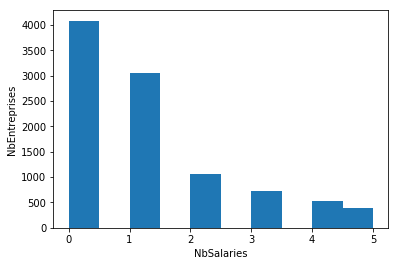

In [61]:
%matplotlib inline

hist1 = smallCompanyData['NbSalaries'].plot(kind='hist')
hist1.set_xlabel("NbSalaries")
hist1.set_ylabel("NbEntreprises")

Text(0,0.5,'NbEntreprises')

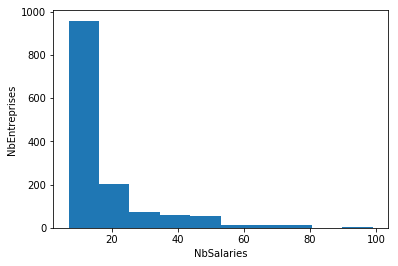

In [62]:
hist2 = mediumCompanyData['NbSalaries'].plot(x='_id', y='total', kind='hist')
hist2.set_xlabel("NbSalaries")
hist2.set_ylabel("NbEntreprises")

Text(0,0.5,'NbEntreprises')

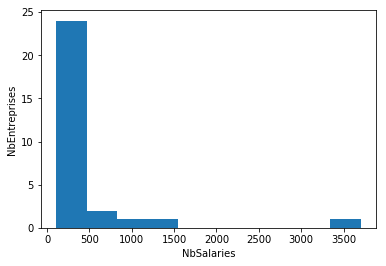

In [63]:
hist3 = bigCompanyData['NbSalaries'].plot(x='_id', y='total', kind='hist')
hist3.set_xlabel("NbSalaries")
hist3.set_ylabel("NbEntreprises")

Les trois histogrammes construits suggèrent qu'ils existent 7 catégories (secteurs d'activités) de clients (en se basant sur le nombres de salariés dans les entreprises):
<ul>
    <li>les particuliers (0 ou 1 personnes);</li>
    <li>divers (2 à 5 personnes);</li>
    <li>les start-ups (5 à 10 personnes);</li>
    <li>les PME (11 à 200 personnes);</li>
    <li>les grandes entreprises (300 à 1500 personnes);</li>
    <li>et les entreprises de taille internationales (plus de 3000 personnes).</li>
</ul>
De ce fait, il est logique de procéder aux analyses statistiques en regroupants les clients venant du même secteur d'activité.

Pour ce faire, nous allons réutiliser le code préalablement défini pour faire apparaître ces différents groupes...

In [64]:
normalCustomersData = dataManager1.getDataframe().loc[dataManager1.getDataframe()['NbSalaries'] <= 1]

othersData = dataManager1.getDataframe().loc[(dataManager1.getDataframe()['NbSalaries'] >= 2) & (dataManager1.getDataframe()['NbSalaries'] <= 5)]

startUpData = dataManager1.getDataframe().loc[(dataManager1.getDataframe()['NbSalaries'] >= 5) & (dataManager1.getDataframe()['NbSalaries'] <= 10)]

PMEData = dataManager1.getDataframe().loc[(dataManager1.getDataframe()['NbSalaries'] >= 11) & (dataManager1.getDataframe()['NbSalaries'] <= 200)]

localEnterpriseData = dataManager1.getDataframe().loc[(dataManager1.getDataframe()['NbSalaries'] >= 300) & (dataManager1.getDataframe()['NbSalaries'] <= 1500)]

internationalEnterpriseData = dataManager1.getDataframe().loc[(dataManager1.getDataframe()['NbSalaries'] >= 3000)]

<strong>Analyses statistiques sur les particuliers:</strong>

In [65]:
print("Moyenne du salaire pour les particuliers:")
print(str(normalCustomersData['CapaciteEmprunt'].mean())+"\n")
# utiliser ddof = 0 en arguements pour la variance biasé
print("La variance sur chaque colonne du tableau (NON BIAISE):")
print(normalCustomersData.var())
print("\n")
print("L'écart-type sur chaque colonne du tableau (NON BIAISE):")
print(normalCustomersData.std())

Moyenne du salaire pour les particuliers:
9516.330968601058

La variance sur chaque colonne du tableau (NON BIAISE):
CapaciteEmprunt       3.225326e+08
PrevisionnelAnnuel    1.153498e+08
NbSalaries            2.447824e-01
P1                    5.774548e+08
P2                    2.426808e+07
P3                    1.492900e+08
P4                    9.529090e+07
P5                    1.808758e+08
P6                    4.490461e+07
P7                    2.370901e+06
P8                    4.781930e+06
P9                    2.104135e+06
P11                   3.853632e+05
P12                   1.664259e+08
P13                   6.340617e+07
P14                   1.497539e+07
P15                   4.263507e+06
P16                   1.121376e+08
P18                   4.440553e+05
P19                   1.603332e+06
P20                   7.465829e+08
P21                   4.007559e+07
P22                   3.780173e+08
P23                   1.444075e+07
P24                   6.293626e+05
P25     

In [66]:
# https://www.math.univ-toulouse.fr/~besse/Wikistat/pdf/st-tutor3-python-scikit.pdf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# takes a pandas dataframe as argument
def min_maxNormalization(data):
    df = data
    df_norm = (df - df.min()) / (df.max() - df.min())
    return df_norm

dataManager4 = DataManager("Alphaprise.xlsx", "apprentissage")
dataManager4.replaceColumnValue("PrevisionnelAnnuel", "[^0-9.e+]")
dataManager4.columnToNumeric("PrevisionnelAnnuel")
dataManager4.columnToNumeric("NbSalaries")
dataManager4.dropColumns([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 27])
dataManager4.getDataframe()

#normalizedData = meanNormalization(dataManager3.getDataframe())
normalizedData = min_maxNormalization(dataManager4.getDataframe())

# check if normalized correctly
digits = datasets.load_digits()
X=digits.data
y=digits.target

pca = PCA()
# Estimation, calcul des composantes principales
C = pca.fit(X).transform(X)
# Décroissance de la variance expliquée

<strong>Ici on vérifie que les données sont correctement normalisées</strong>

In [67]:
normalizedData.max() - normalizedData.min()

P1     1.0
P2     1.0
P3     1.0
P4     1.0
P5     1.0
P6     1.0
P7     1.0
P8     1.0
P9     1.0
P11    1.0
P12    1.0
P13    1.0
P14    1.0
P15    1.0
P16    1.0
P18    1.0
P19    1.0
P20    1.0
P21    1.0
P22    1.0
P23    1.0
P24    1.0
P25    1.0
P26    1.0
P27    1.0
P28    1.0
P29    1.0
P30    1.0
dtype: float64

[  1.48905936e-01   1.36187712e-01   1.17945938e-01   8.40997942e-02
   5.78241466e-02   4.91691032e-02   4.31598701e-02   3.66137258e-02
   3.35324810e-02   3.07880621e-02   2.37234084e-02   2.27269657e-02
   1.82186331e-02   1.77385494e-02   1.46710109e-02   1.40971560e-02
   1.31858920e-02   1.24813782e-02   1.01771796e-02   9.05617439e-03
   8.89538461e-03   7.97123157e-03   7.67493255e-03   7.22903569e-03
   6.95888851e-03   5.96081458e-03   5.75614688e-03   5.15157582e-03
   4.89539777e-03   4.28887968e-03   3.73606048e-03   3.53274223e-03
   3.36683986e-03   3.28029851e-03   3.08320884e-03   2.93778629e-03
   2.56588609e-03   2.27742397e-03   2.22277922e-03   2.11430393e-03
   1.89909062e-03   1.58652907e-03   1.51159934e-03   1.40578764e-03
   1.16622290e-03   1.07492521e-03   9.64053065e-04   7.74630271e-04
   5.57211553e-04   4.04330693e-04   2.09916327e-04   8.24797098e-05
   5.25149980e-05   5.05243719e-05   3.29961363e-05   1.24365445e-05
   7.04827911e-06   3.01432139e-06

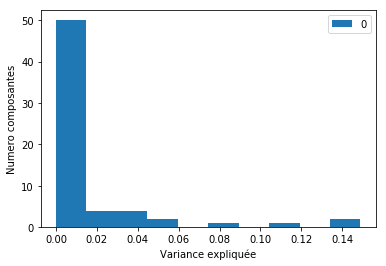

In [68]:
print(pca.explained_variance_ratio_)
#print(type(pca.explained_variance_ratio_))

pcaExplained = pd.DataFrame(data=pca.explained_variance_ratio_)

hist1 = pcaExplained.plot(kind='hist')
hist1.set_xlabel("Variance expliquée")
hist1.set_ylabel("Numero composantes")

somme = 0
for i in range (0, len(pca.explained_variance_ratio_)):
    somme = somme + pca.explained_variance_ratio_[i]
print(somme)

<Strong>
<p>Ici on voit rapidement que les 3 premières valeurs en e-01 sont les plus représentatives de l'information.</p>
<p>Dans un deuxième temps, on peut aussi utiliser en plus les valeurs en e-02</p>
</Strong>

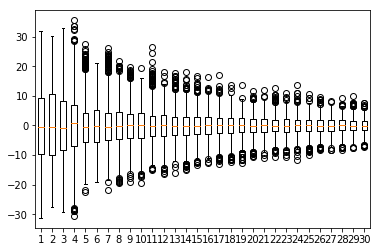

In [69]:
plt.boxplot(C[:,0:30])
plt.show()

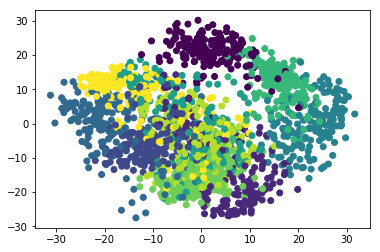

In [70]:
pca1_2 = PCA(n_components = 3)
C = pca1_2.fit(X).transform(X)
target_name=[0,1,2]
plt.scatter(C[:,0], C[:,1], c=y, label=target_name)
plt.show()

<strong><p>
On remarque sur ce graphique 8 groupes plus ou moins distincts.
Ici on a utilisé seulement les 3 premières composantes.
</p></strong>

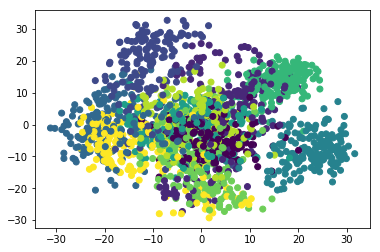

In [71]:
pca1_3 = PCA(n_components = 3)
D = pca1_3.fit(X).transform(X)
target_name=[0,1,2]
plt.scatter(D[:,0], D[:,2], c=y, label=target_name)
plt.show()

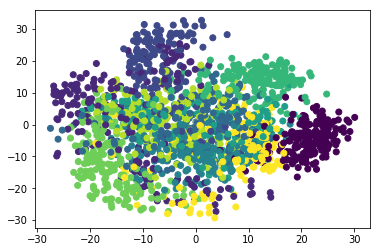

In [72]:
pca2_3 = PCA(n_components = 19)
D = pca2_3.fit(X).transform(X)
target_name=[0,1,2]
plt.scatter(D[:,1], D[:,2], c=y, label=target_name)
plt.show()

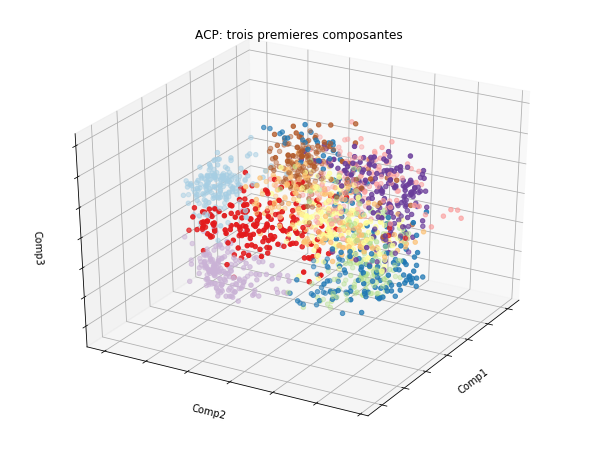

In [73]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=150)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], c=y,
cmap=plt.cm.Paired)
ax.set_title("ACP: trois premieres composantes")
ax.set_xlabel("Comp1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Comp2")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Comp3")
ax.w_zaxis.set_ticklabels([])
plt.show()

<strong>
K-Means sur données ACP normalisées
</strong>

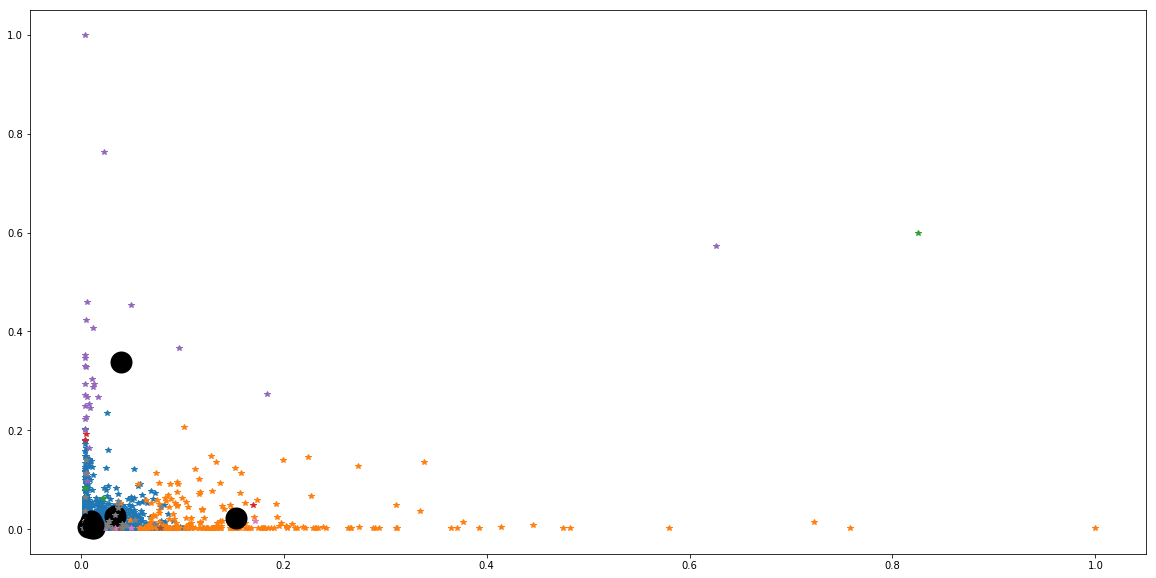

In [74]:
from scipy import stats
from sklearn.cluster import KMeans
import seaborn as sns

plt.rcParams['figure.figsize'] = 20, 10

ax = plt.axes()

k = 8
kmean_data = normalizedData.as_matrix()
kmeans = KMeans(n_clusters=k, random_state=0).fit(kmean_data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

for i in range(k):
    # select only data observations with cluster label == i
    ds = kmean_data[np.where(labels==i)]
    # plot the data observations

    plt.plot(ds[:,0],ds[:,1],'*')
    # plot the centroids
    lines = plt.plot(centroids[i,0],centroids[i,1],'ko')
    # make the centroid x's bigger
    plt.setp(lines,ms=20.0)
    plt.setp(lines,mew=2.0)

plt.show()